# Geospatial Data Processing in Python: A Comprehensive Tutorial

![](https://pretalx.com/media/pyconde-pydata-berlin-2023/img/download_9fA8a9e.png)


## Part 1: Retrieving Data, First Steps


### Raster data

#### GDAL

Geospatial Data Abstraction Library https://www.gdal.org

Supports more than 100 **Raster Formats** (and also vector formats)

Tons of utility programs

https://gdal.org/programs/index.html


### Let's get some raster data

Let's get a **global** raster dataset, this means a dataset covering our whole planet.

We're downloading the **natural earth raster dataset**

The license is public domain, this means you can do whatever you want to do with the data.

We are downloading the "large size" dataset (309.77 MB).

We will download everything in a new directory called "geodata". Let's create it:

In [1]:
import os

if not os.path.exists("geodata"):
    os.mkdir("geodata")

in the Python File download.py I created 2 simple functions:


Download a file with a text base progress bar:

    download(url, destfile, overwrite=False)


Unzip a zip-File. Don't overwrite already unzipped files.

    unzip(source, dest)


In [2]:
from download import download, unzip

### About the Naturalearth Dataset

The Natural Earth dataset is a free and open-source **vector** and **raster** map data package that provides basic geographic information for the entire world. The dataset was created by Nathaniel Vaughn Kelso and Tom Patterson, and is maintained by a community of contributors.

The Natural Earth dataset includes several layers of geographic data, including:

* Physical features: such as land, ocean, and coastline boundaries, as well as major rivers, lakes, and mountains.
* Cultural features: such as country and state boundaries, populated places, roads, and railways.
* Geographical features: such as time zones, land cover, and elevation.

The data is available in various formats, including shapefiles, GeoJSON, and raster files, and is designed to be easily used with a variety of GIS software and applications.

The Natural Earth dataset is widely used in cartography, geography, and other fields that require accurate and up-to-date geographic information. It is also used as a base layer for a range of mapping applications, including web mapping, data visualization, and geographic analysis.


More info: https://www.naturalearthdata.com/

Now we are downloading a raster dataset: more info/overview here: https://www.naturalearthdata.com/downloads/10m-raster-data/
Later we will also download the vector dataset.


In [3]:
# Let's download the data:
url ="https://naciscdn.org/naturalearth/10m/raster/NE2_HR_LC_SR_W.zip"
#url = "https://www.geopython.xyz/geodata/naturalearth/NE2_HR_LC_SR_W.zip"  # use this if url above doesn't work

download(url, "geodata/ne_raster.zip", False)

100% done 	[****************************************************************************************************]


In [ ]:
unzip("geodata/ne_raster.zip", "geodata")

## Using GDAL Utilities

### Raster Information

Using the tool "gdalinfo" we can get some information about raster data. This is one of many utility programs that come with GDAL.
(https://gdal.org/programs/index.html)

In Jupyter Notebooks we can call a program/command using ! as prefix.

You can also call the utilities from the anaconda prompt (don't forget to activate our environment!)

So let's call `gdalinfo` with our newly downloaded dataset:

In [ ]:
!gdalinfo geodata/NE2_HR_LC_SR_W.tif

## Open Dataset in QGIS

You can drag and drop the raster file NE2_HR_LC_SR_W.tif into QGIS. You will notice a few things:


* If you move your mouse around you see the geographic coordinate on the bottom bar.
* You also see **EPSG:4326**, which represents the Coordinate Reference System (CRS) of the image, which is WGS84. More about that later.
* With your mouse wheel you can zoom in/out. Zoom in until you see pixel blocks (max resolution)



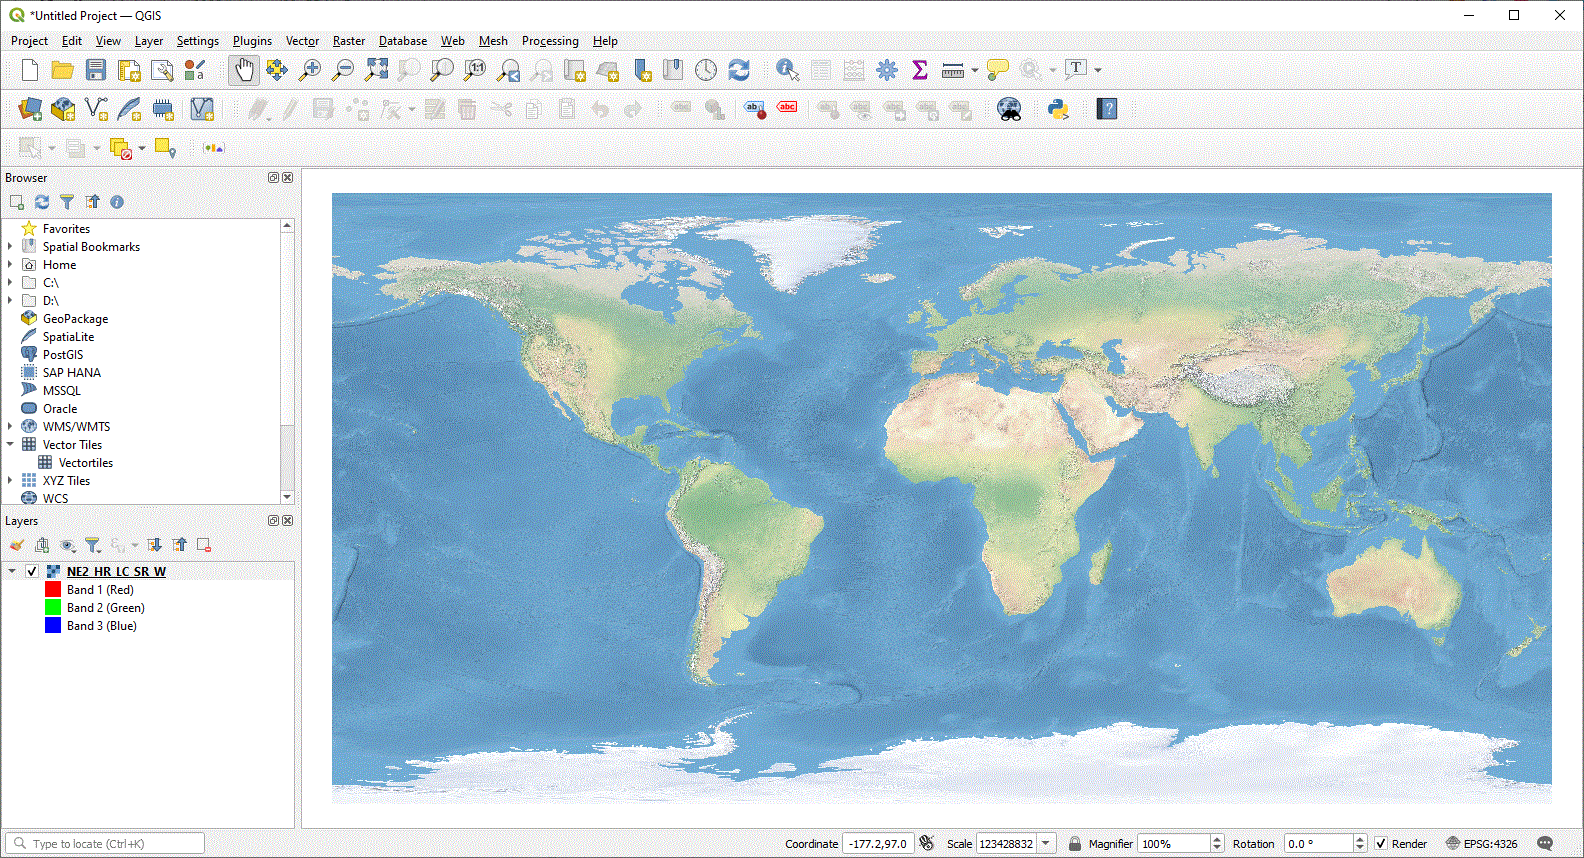</img>



## Georeferencing

QGIS can convert mouse (or pixel) coordinates to map coordinates because there is an additional information stored in the raster file.

### Using Worldfiles

Georeferencing Raster Data using "World files".<br/>
The specification was introduced by Esri. Today world files are outdated but still used. It is also a good way to show how it works.

* TIFF -> .tfw  
* PNG -> .pgw 
* JPEG -> .jgw  
* GIF   -> .gfw

The world file is an ASCII Text file with the following layout:

* Line 1: A: pixel size in the x-direction in map units/pixel
* Line 2: D: rotation about y-axis  (-> most cases 0)
* Line 3: B: rotation about x-axis  (-> most cases 0)
* Line 4: E: pixel size in the y-direction in map units, almost always negative
* Line 5: C: x-coordinate of the center of the upper left pixel
* Line 6: F: y-coordinate of the center of the upper left pixel


Our file contains a ".tfw". You can look at it now. However, this info is also stored in the image header (see below)

The world file only covers an **affine transformation**. We don't know anything else about the **coordinate reference system** (CRS).

This information can be stored in a .prj file, but sometimes this is not provided and you have to select it manually in your GIS.


#### Map Projections & CRS
(from QGIS Docs, https://docs.qgis.org/3.28/en/docs/gentle_gis_introduction/coordinate_reference_systems.html)

Map projections try to portray the surface of the earth, or a portion of the earth, on a flat piece of paper or computer screen. In layman’s term, map projections try to transform the earth from its spherical shape (3D) to a planar shape (2D).

A coordinate reference system (CRS) then defines how the two-dimensional, projected map in your GIS relates to real places on the earth. The decision of which map projection and CRS to use depends on the regional extent of the area you want to work in, on the analysis you want to do, and often on the availability of data.

(more about CRS later in the tutorial)

### Image Header

Many raster formats have headers for custom data. For example TIFF Files can have a "Geo" Header containing additional information such as georeferenciation. Those files are also called GeoTiff.

It contains the affince transformation and the coordinate reference system (CRS).


#### Using 'gdal_translate'

Creating a new file in a new format (e.g. GeoTiff) including the affine transformation and CRS:

     gdal_translate -of GTiff -co COMPRESS=JPEG -a_srs EPSG:4326 -a_ullr -180 90 180 -90 geodata/NE2_HR_LC_SR_W.tif geodata/world.tif
     
However this is not necessary as the file is already a GeoTiff. The ".tfw" is not really necessary in this case, but still provided by Natural Earth.


### aux.xml Files

For formats that don't have a header GDAL creates aux.xml files containing georeferencing info (CRS and affine transformation)




Create a GeoTIFF with JPEG Compression. COMPRESS can be:

JPEG/LZW/PACKBITS/DEFLATE/CCITTRLE/CCITTFAX3/CCITTFAX4/LZMA/ZSTD/LERC/LERC_DEFLATE/LERC_ZSTD/WEBP/JXL/NONE


In [ ]:
!gdal_translate -of GTiff -co COMPRESS=JPEG -a_srs EPSG:4326 -a_ullr -180 90 180 -90 geodata/NE2_HR_LC_SR_W.tif geodata/world.tif

In [ ]:
!gdal_translate -of JP2OpenJPEG -a_srs EPSG:4326 -a_ullr -180 90 180 -90 geodata/NE2_HR_LC_SR_W.tif geodata/world2.jp2

## Changing Image Size


`gdal_translate` can also be used to change the image dimensions (with and height).

The parameter is -outsize and you can give the dimensions in percent or pixels. If one of them is 0, the correct asepect ratio is calculated automatically.

Examples:

    gdal_translate -outsize 2048 1024 geodata/NE2_HR_LC_SR_W.tif geodata/world_small.tif
    gdal_translate -outsize 5000 0 geodata/NE2_HR_LC_SR_W.tif geodata/world_medium.tif
    gdal_translate -outsize 50% 50% geodata/NE2_HR_LC_SR_W.tif geodata/world_half.tif


Let's try this out:


In [ ]:
!gdal_translate -outsize 2048 1024 geodata/NE2_HR_LC_SR_W.tif geodata/world_small.tif

In [ ]:
!gdalinfo geodata/world_small.tif

## Extracting a Rectangle

If we want to extract a part of a (large) raster file, we can also use the `gdal_translate` tool. 

Let's extract Switzerland from the bluemarble dataset:

The bounding box of Switzerland is  (5.96,45.82)-(10.49, 47.81)

we can use the `-projwin` flag to extract it. Please note that the origin of the extract is top left.

In [ ]:
!gdal_translate -of GTiff -co TILED=YES -projwin 5.96 47.81 10.49 45.82 geodata/world.tif geodata/switzerland.tif

## Working with Elevation Data

So far we only looked at raster files containing RGB images with 8 bit (1 Byte) per band. There is basically no limitation what datatype a band is and how many there are. We are looking at Elevation data, typically containing floating point data for each raster point, representing elevation.


We will download the SRTM dataset.

SRTM Elevation dataset can be obtained at:

* https://srtm.csi.cgiar.org/srtmdata


In [ ]:
# download and extract SRTM elevation data over Switzerland:

url = "https://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_38_03.zip"
#url = "https://www.geopython.xyz/geodata/srtm/srtm_38_03.zip"

# Download and unzip url:
download(url, "geodata/" + os.path.basename(url), False)
unzip(f"geodata/{os.path.basename(url)}", "geodata")

(all SRTM data of the planet, including vrt and ovr is available here: https://www.geopython.xyz/geodata/processed/srtm.zip )

**DO NOT DOWNLOAD DURING CONFERENCE** (this is 30+ GB)


### Hillshading

In [ ]:
!gdaldem hillshade geodata/srtm_38_03.tif geodata/srtm_38_03_hillshade.png

### Color Relief Map

For the color relief map we need a text file. This can be created quite easily.

* First entry is the elevation value from
* Then the color in 8-bit RGB

You do this for each line. There is basically no limitation how many colors you use. To keep it simple we create the file using Python with only a few entries:

In [ ]:
color_text_file = """0 110 220 110
500 240 250 160 
1500 230 220 170 
2000 220 220 220
2500 250 250 250"""

file = open("geodata/color.txt", "w")
file.write(color_text_file)
file.close()

In [ ]:
!gdaldem color-relief geodata/srtm_38_03.tif geodata/color.txt geodata/srtm_38_03_color_relief_map.png

### More GDAL Programs

There are tons of more gdal utility programs. We're not looking at all now. You can do that at https://gdal.org/programs/index.html

Also, many gdal programs can be executed from QGIS, as QGIS also uses GDAL.

From now on we do most things in Python as we have more control over things.